# This project is aimed at predicting the quality of red wine samples and the factors that affect the qualities

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data sets
redwine = pd.read_csv('/content/winequality-red.csv')
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# REDWINE DATA CLEANING

In [ ]:
#Description of the datasets
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# DATA CLEANING

In [ ]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
redwine.duplicated().sum()
# total no of 240 duplicated values

240

In [ ]:
#Duplicate values droped
redwine = redwine.drop_duplicates()
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
redwine.isnull().sum()
# no null vaalues found

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Correlation of the data values
print(redwine.corr() ['quality'].sort_values(ascending = False),'\n')

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64 



# VISUALIZATIONS

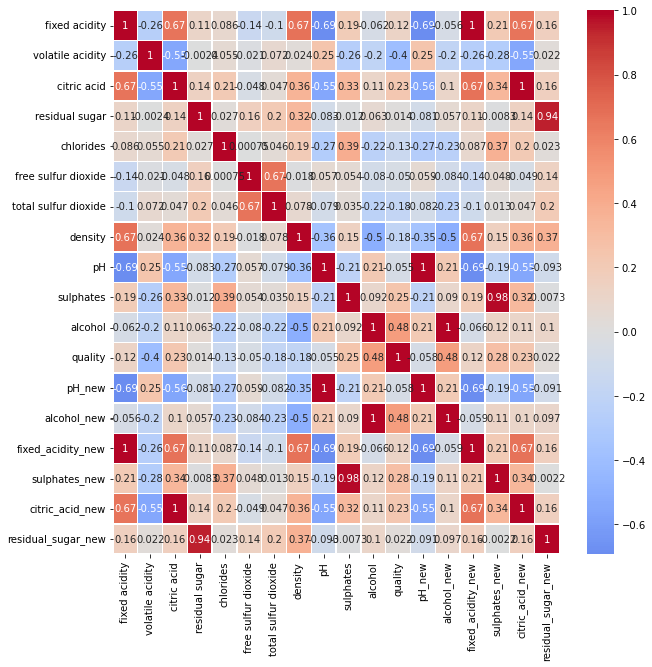

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(redwine.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

### Histogram showing the distribution of the quality of redwine


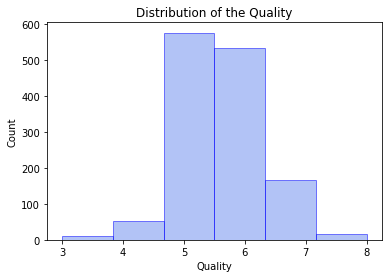

In [ ]:
plt.hist(redwine.quality,bins=6,alpha=0.5,histtype='bar',ec='blue')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
# The histogram shows that most of the wine quality lies between the value of 5 and 7. 
# We have a few wine with high quality of 8 and even a lesser quantity of wine with the low quality of 3

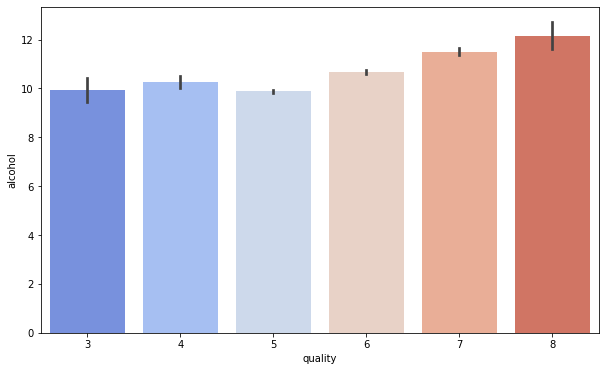

In [ ]:
fig = plt.figure(figsize = (10,6))
sn.barplot(x = 'quality', y = 'alcohol', data = redwine)
sn.set_palette('coolwarm')

#The highest quality of Red wine has more alchol in them and the lesser the quality of the wine, the lesser the amount of alchol

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x576 with 0 Axes>

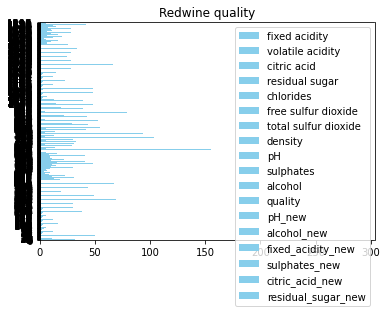

In [ ]:
plt.figure(figsize=(10,8))
redwine.plot(kind='barh', color='skyblue',width=0.9)
plt.title('Redwine quality')
plt.show

# TRAINING $ MODELLING

In [ ]:
redwine.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
# Isolate the independent variables

X = redwine[["alcohol","pH", "fixed acidity", "sulphates","citric acid","residual sugar"]]
X.head()

,alcohol,pH,fixed acidity,sulphates,citric acid,residual sugar
0,9.4,3.51,7.4,0.56,0.00,1.9
1,9.8,3.20,7.8,0.68,0.00,2.6
2,9.8,3.26,7.8,0.65,0.04,2.3
3,9.8,3.16,11.2,0.58,0.56,1.9
5,9.4,3.51,7.4,0.56,0.00,1.8


In [ ]:
#Isolating the dependent variable

In [ ]:
y = redwine.quality
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

# USING LINEAR REGRESSION

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict(X)

array([5.01665008, 5.35155309, 5.3269903 , ..., 5.82849301, 5.42174509,
       5.81820258])

In [ ]:
model.score(X,y)

0.2920529919766709

# USING LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [ ]:
#Testing and Training the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#measuring model accuracy

In [ ]:
model1.score(X_test, y_test)

0.5833333333333334

In [ ]:
y_predicted = model1.predict(X_test)
y_predicted

array([6, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 5, 7, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 7,
       5, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 7, 5, 7, 6, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 7, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6, 6, 6,

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   9,   6,   1,   0],
       [  0,   0, 138,  43,   2,   0],
       [  0,   0,  66,  92,   5,   0],
       [  0,   0,   6,  23,   8,   0],
       [  0,   0,   0,   4,   2,   0]])

Text(69.0, 0.5, 'Truth')

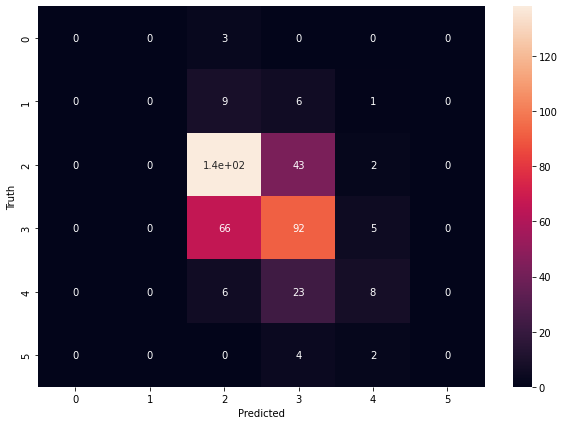

In [ ]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# USING RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1,oob_score=True)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
model2.score(X_test, y_test)

0.5931372549019608

In [ ]:
grid_model = RandomForestClassifier(random_state= 42,n_jobs=-1)

In [ ]:
params = {
    'max_depth':[20,40,65,80,100],
    'min_samples_leaf':[50,100,200,400,500],
    'n_estimators':[50,100,200,400,500]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
GridSearch = GridSearchCV (
    estimator= grid_model,
    param_grid = params,
    cv = 4,
    n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
GridSearch.fit(X_train,y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 40, 65, 80, 100],
                         'min_samples_leaf': [50, 100, 200, 400, 500],
                         'n_estimators': [50, 100, 200, 400, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
GridSearch.best_score_

0.5741499131298089

# USING DECISION TREE MODEL

In [ ]:
#Importing label encoder and assigning variable names the the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_pH= LabelEncoder()
label_alcohol= LabelEncoder()
label_fixed_acidity= LabelEncoder()
label_sulphates= LabelEncoder()
label_citric_acid= LabelEncoder()
label_residual_sugar= LabelEncoder()

In [ ]:
#Renaming the columns
redwine['pH_new']=label_pH.fit_transform(redwine['pH'])
redwine['alcohol_new']=label_alcohol.fit_transform(redwine['alcohol'])
redwine['fixed_acidity_new']=label_fixed_acidity.fit_transform(redwine['fixed acidity'])
redwine['sulphates_new']=label_sulphates.fit_transform(redwine['sulphates'])
redwine['citric_acid_new']=label_citric_acid.fit_transform(redwine['citric acid'])
redwine['residual_sugar_new']=label_residual_sugar.fit_transform(redwine['residual sugar'])

In [ ]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_new,alcohol_new,fixed_acidity_new,sulphates_new,citric_acid_new,residual_sugar_new
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,63,11,27,18,0,10
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,32,17,31,30,0,22
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,38,17,31,27,4,17
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,28,17,65,20,56,10
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,63,11,27,18,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,54,12,21,44,8,10
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,57,26,15,20,8,11
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,64,36,12,38,10,15
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,69,23,12,33,12,11


In [ ]:
redwine1 = redwine[['pH_new', 'alcohol_new', 'fixed_acidity_new', 'sulphates_new', 'citric_acid_new', 'residual_sugar_new' ]]
redwine1

,pH_new,alcohol_new,fixed_acidity_new,sulphates_new,citric_acid_new,residual_sugar_new
0,63,11,27,18,0,10
1,32,17,31,30,0,22
2,38,17,31,27,4,17
3,28,17,65,20,56,10
5,63,11,27,18,0,9
...,...,...,...,...,...,...
1593,54,12,21,44,8,10
1594,57,26,15,20,8,11
1595,64,36,12,38,10,15
1597,69,23,12,33,12,11


In [ ]:
#importing our model
from sklearn import tree
model3=tree.DecisionTreeClassifier()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(redwine1, redwine.quality, test_size=0.2)

In [ ]:
#fitting our model
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model3.score(X_test,y_test)

0.46691176470588236